In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# Exercises

Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository. For these exercises, YOU ONLY NEED TO DO KMEANS. If you have extra time, then you can play around with DBSCAN.

### 1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.
    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.


In [98]:
df=data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [99]:
df=df.rename(columns={'Sepal.Length':'sepal_length','Sepal.Width':'sepal_width','Petal.Length':'petal_length','Petal.Width':'petal_width','Species':'species',})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [100]:
# # programmatic way to rename  the columns

# for col in df.columns:
#     new_col_names = []

# for col in df.columns:
#     new_col_names.append(col.lower().replace('.', '_'))
    
# df.columns = new_col_names

# df.head()


In [101]:
# choosing sepal length and sepal width as the features
X= df[['sepal_length','sepal_width']]

In [102]:
# creating and fit the cluster models.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [103]:
# adding the cluster column to the datframe
df['clusters'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

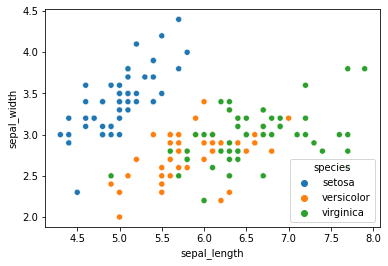

In [25]:
# visualizing the clusters

sns.scatterplot(x='sepal_length',y='sepal_width',hue='species', data= df)


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

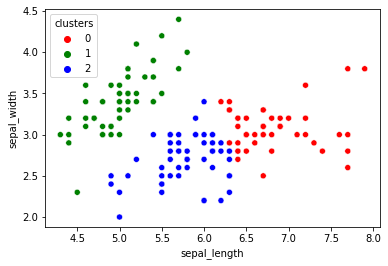

In [30]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='clusters', data= df,palette=['red','green','blue'])

- ### using a elbow method to find the ideal cluster numbers


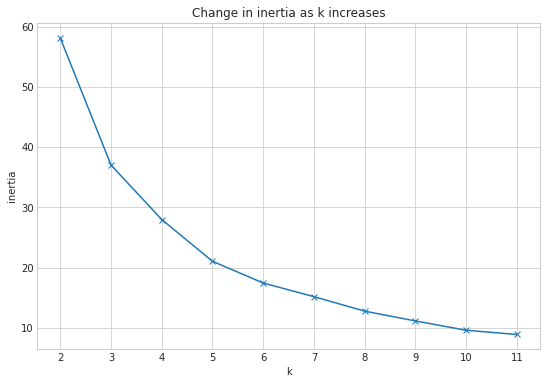

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

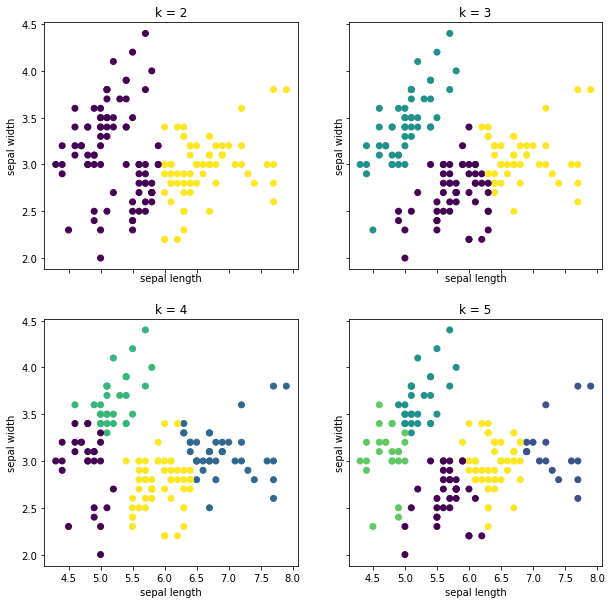

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

## using 3 features

In [45]:
# list the three features to use
feat= df[['sepal_length','sepal_width','petal_length']]
feat.head()

,sepal_length,sepal_width,petal_length
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4


In [48]:
# use the kmeans model and fit it to the X(data sample with the features we want to use)
kmeans=KMeans(n_clusters=3)
kmeans.fit(feat)
clusters1= kmeans.predict(feat)

In [49]:
#add the columns clusters with three features
df['three_feat']= clusters1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,three_feat
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


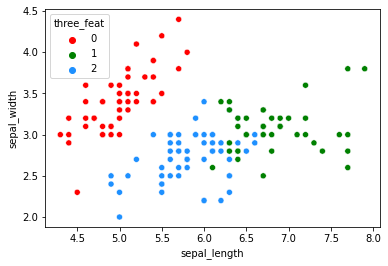

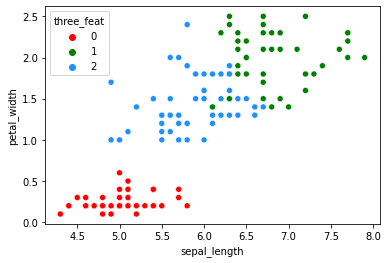

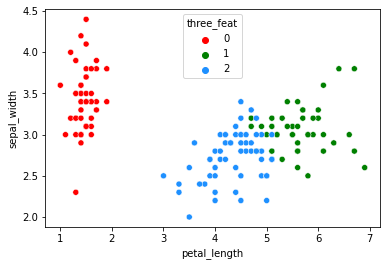

In [56]:
# plot 

sns.scatterplot(x='sepal_length',y='sepal_width', hue='three_feat', data= df,palette=['red','green','dodgerblue'])
plt.show()
sns.scatterplot(x='sepal_length',y='petal_width', hue='three_feat', data= df,palette=['red','green','dodgerblue'])
plt.show()
sns.scatterplot(x='petal_length',y='sepal_width', hue='three_feat', data= df,palette=['red','green','dodgerblue'])
plt.show()


##### Modeling

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [61]:
from sklearn.model_selection import train_test_split
import env

# function to establish connection to MySQL workbench to retrieve data.
def get_connection(db, user=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{env.username}:{env.password}@{env.host}/{db}'

In [58]:
sql= '''Select * from customers'''

In [107]:
df= pd.read_sql(sql,get_connection('mall_customers'))
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
df.isnull().sum()
df=pd.get_dummies(df, drop_first= True)

In [109]:
df.head()

,customer_id,age,annual_income,spending_score,gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [110]:

# splitting the data into train, test and validate
seed = 123

train, test_val = train_test_split(df, train_size=0.7,
                                   random_state=seed)

test, val = train_test_split(test_val, train_size=0.5,
                                       random_state=seed)

train.shape, val.shape, test.shape

((140, 5), (30, 5), (30, 5))

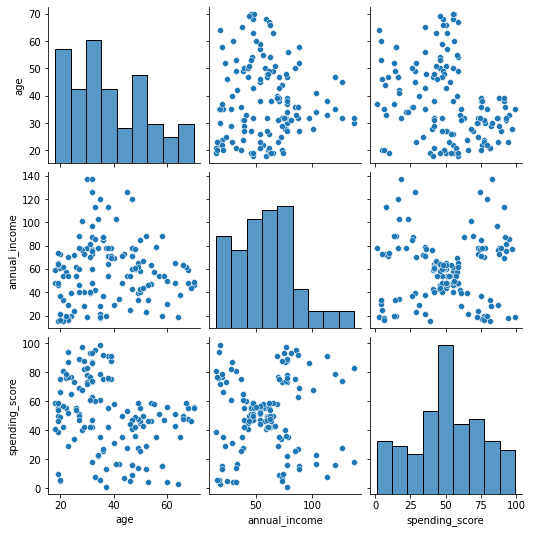

In [85]:
sns.pairplot(train.drop(columns=['gender_Male','customer_id']))


In [152]:
# takeaways from pairplot, anuual income and spending score
# can try age and spending score as well
X= train[['annual_income','spending_score']]
X.head()

,annual_income,spending_score
81,54,55
107,63,46
112,64,42
145,77,97
8,19,3


In [153]:
#clustering by using three features and 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 2, 2, 3, 0, 3, 1, 2, 0, 2, 0, 2, 3, 2, 1, 0, 1, 3, 1, 2, 2, 0,
       3, 1, 2, 2, 0, 1, 2, 3, 0, 2, 3, 2, 3, 2, 0, 3, 2, 2, 2, 3, 0, 2,
       2, 3, 1, 3, 3, 1, 2, 2, 0, 1, 2, 2, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 3, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3,
       3, 3, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 0, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

In [154]:
train['cluster']= clusters
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,cluster
81,82,38,54,55,1,2
107,108,54,63,46,1,2
112,113,38,64,42,0,2
145,146,28,77,97,1,3
8,9,64,19,3,1,0


In [155]:
train.cluster.value_counts()

2    73
3    27
1    23
0    17
Name: cluster, dtype: int64

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

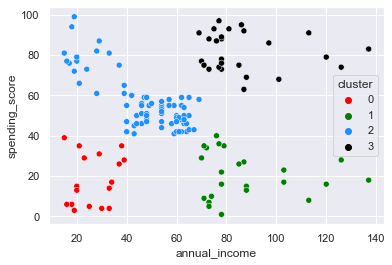

In [156]:
sns.scatterplot(x='annual_income', y='spending_score',data= train, hue='cluster', palette=['red','green','dodgerblue','black'])

<AxesSubplot:xlabel='age', ylabel='spending_score'>

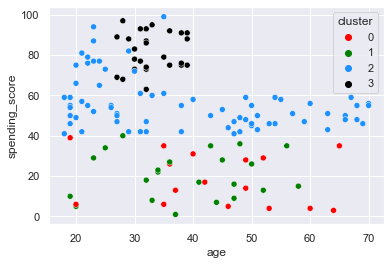

In [157]:
sns.scatterplot(x='age', y='spending_score',data= train, hue='cluster', palette=['red','green','dodgerblue','black'])

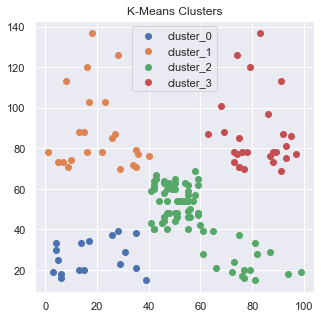

In [158]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

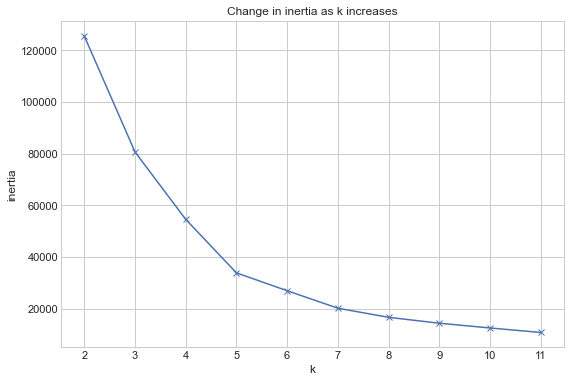

In [159]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [160]:
X.head()

,annual_income,spending_score
81,54,55
107,63,46
112,64,42
145,77,97
8,19,3


In [161]:
wcss=[]

for i in range(1,12):
    kmeans= KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

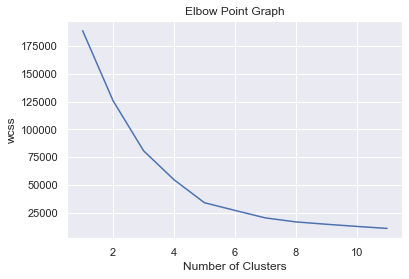

In [162]:
#plot an elbow graph
sns.set()
plt.plot(range(1,12),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

### optimum number of clusters  is 5 as from elbow graph


In [163]:
kmeans= KMeans(n_clusters=5)
# returm a label for each datapoint based on cluster
Y= kmeans.fit_predict(X)
Y

array([0, 0, 0, 2, 3, 2, 4, 0, 3, 0, 3, 1, 2, 0, 4, 3, 4, 2, 4, 0, 1, 3,
       2, 0, 1, 1, 3, 4, 1, 2, 3, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0, 2, 3, 1,
       0, 2, 4, 2, 2, 0, 0, 1, 3, 4, 0, 0, 2, 4, 2, 2, 0, 1, 1, 0, 1, 0,
       4, 0, 4, 0, 0, 0, 1, 3, 3, 4, 0, 1, 0, 0, 2, 0, 3, 4, 0, 2, 0, 1,
       4, 3, 4, 0, 0, 0, 0, 2, 2, 0, 3, 2, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2,
       2, 2, 1, 0, 3, 0, 0, 0, 4, 4, 0, 4, 2, 0, 4, 3, 0, 0, 4, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [168]:
# visualize all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[y==0,1],c='green',label='cluster 1')
plt.scatter(X[Y==1,0],X[y==1,1],c='red' ,label='cluster 2')
plt.scatter(X[Y==2,0],X[y==2,1], c='blue',label='cluster 3')
plt.scatter(X[Y==3,0],X[y==3,1], c='black',label='cluster 4')
plt.scatter(X[Y==4,0],X[y==4,1], c='yellow',label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='cyan',label='centroids')
plt.title('customers group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

InvalidIndexError: (array([ True,  True,  True, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True]), 0)

<Figure size 576x576 with 0 Axes>

#### 3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.